In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from keras import applications, optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input
from keras.applications.vgg16 import vgg16, preprocess_input
from keras.utils import to_categorical
from keras.models import *
import numpy as np
import keras
import h5py
import functools
ile_ras = 40

Using TensorFlow backend.


In [3]:
cd gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
ls

sample_data/


In [0]:
hf = h5py.File('XYtrain_test.h5', 'r')
x_train = hf.get('x_train')
y_train = hf.get('y_train')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = hf.get('x_test')
y_test = hf.get('y_test')
x_test = np.array(x_test)
y_test = np.array(y_test)
hf.close()

In [0]:
y_test = to_categorical(y_test)

In [0]:
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc' 

In [7]:
img_width, img_height = 224, 224
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
for layer in model.layers:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(40, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy",top5_acc])

model_final.summary()

W0618 16:35:15.901832 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 16:35:15.978380 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 16:35:16.002107 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 16:35:16.049293 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 2s 0us/step


W0618 16:35:18.984743 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 16:35:18.986093 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
W0618 16:35:22.831639 140433708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
for l in model_final.layers:
    print(l.name, l.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten_1 True
dense_1 True
dense_2 True
dense_3 True


In [0]:
epochs = 120

In [0]:
model_final.load_weights('CASE1/case1_weights.h5')

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy",top5_acc])

dict_keys(['loss', 'acc', 'top5_acc'])


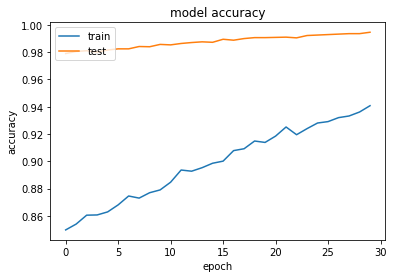

In [0]:
print(learning.history.keys())
plt.plot(learning.history['acc'])
plt.plot(learning.history['top5_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
learning = model_final.fit(x_train, y_train, epochs=epochs, batch_size = 64, validation_split=0.1)

W0618 16:35:48.381578 140433708164992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5253 samples, validate on 584 samples
Epoch 1/120
5253/5253 [==============================] - 42s 8ms/step - loss: 3.6770 - acc: 0.0459 - top5_acc: 0.1831 - val_loss: 3.5990 - val_acc: 0.0599 - val_top5_acc: 0.2329
Epoch 2/120
5253/5253 [==============================] - 33s 6ms/step - loss: 3.5205 - acc: 0.1045 - top5_acc: 0.3269 - val_loss: 3.4932 - val_acc: 0.0839 - val_top5_acc: 0.3459
Epoch 3/120
5253/5253 [==============================] - 32s 6ms/step - loss: 3.3948 - acc: 0.1466 - top5_acc: 0.4251 - val_loss: 3.4053 - val_acc: 0.1113 - val_top5_acc: 0.3955
Epoch 4/120
5253/5253 [==============================] - 32s 6ms/step - loss: 3.2806 - acc: 0.1953 - top5_acc: 0.5073 - val_loss: 3.2916 - val_acc: 0.1798 - val_top5_acc: 0.4777
Epoch 5/120
5253/5253 [==============================] - 33s 6ms/step - loss: 3.1742 - acc: 0.2338 - top5_acc: 0.5711 - val_loss: 3.2086 - val_acc: 0.1969 - val_top5_acc: 0.5223
Epoch 6/120
5253/5253 [==============================] - 32s 6m

In [0]:
x_train = None
y_train = None

In [0]:
model_final.save_weights('case1_weights.h5')

In [13]:
score = model_final.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1460/1460 [==============================] - 12s 8ms/step
Test loss: 1.5496625436495428
Test accuracy: 0.5308219181348199


In [0]:
history1 = np.c_[learning.history["loss"],learning.history['acc'],learning.history['top5_acc'],learning.history['val_loss'],learning.history['val_acc'],learning.history['val_top5_acc']]
hist = np.array(history1)
np.savetxt("case1_hist_n.txt", hist, delimiter=";")

In [0]:
eval = np.c_[score[0],score[1],score[2]]
sc = np.array(eval)
np.savetxt("case1_evaluate.txt", sc, delimiter=";")